# Gramener Case Study

In [1]:
# Import all libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Specifying the right format to parse the dates from csv to pandas
dateparse = lambda x: pd.to_datetime(x, errors='coerce', format='%b-%y')


# Reading data files into pandas
# Specified date parser to parse the dates to datetime format
master = pd.read_csv("loan.csv", parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'], date_parser=dateparse, dayfirst=True, na_values="NA", low_memory=False)

In [2]:
# Definition for pie chart which will be used in various places 
def pie_chart(dataframe, field, title):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe[field].values
        
    fig1, ax1 = plt.subplots()
    fig1.set_size_inches(18.5, 10.5)

    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

In [3]:
# Analysing variables and their types
master.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null da

In [4]:
# Size of the dataframe
master.shape

(39717, 111)

In [5]:
# Checking if there are any duplicate records
len(master.id.unique())

39717

###  Missing Values in Columns


Let's now look at the number of missing values in the df.

We need to either delete or impute the missing values.


In [6]:
# Column-wise missing values 
master.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Let's look at the fraction of missing values in the columns.

In [7]:
# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

Clearly, there are columns with 100% missing values. These are useless for our analysis.

Thus, let's drop these columns.

In [8]:
# Dropping columns where there are 100% missing values. Clearly these columns are not useful for the analysis.
master = master.dropna(axis='columns',how='all')
round(100*(master.isnull().sum()/len(master.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
master.shape

(39717, 57)

In [10]:
# We can remove all the insignificant variables and have only the variables that are significant for our analysis
master = master[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'emp_length', 'pub_rec',
                 'emp_title', 'verification_status', 'home_ownership', 'annual_inc', 'loan_status', 
                 'purpose','zip_code', 'addr_state', 'dti', 'revol_bal', 'revol_util', 'issue_d']]


In [11]:
round(100*(master.isnull().sum()/len(master.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
term                   0.00
int_rate               0.00
grade                  0.00
emp_length             2.71
pub_rec                0.00
emp_title              6.19
verification_status    0.00
home_ownership         0.00
annual_inc             0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
revol_bal              0.00
revol_util             0.13
issue_d                0.00
dtype: float64

###  Missing Values in Rows

We need to either delete or impute the missing values.



In [12]:
# No. of rows having all missing values
master.isnull().all(axis=1).sum()

0

In [13]:
# No. of rows having greater than 3 missing values
len(master[master.isnull().sum(axis=1) > 3].index)

0

In [14]:
# Converting emp_length field to a format which makes it useful for analysis
master['emp_length'] = pd.to_numeric(master['emp_length'].str.strip(' years').apply(lambda x: 0 if x=='< 1' else (10 if x=='10+' else x)))

In [15]:
# Imputing emp_length - Since emp_length is a categorical variable, we can impute by finding the mode
# Converting grade to type 'category'
master['emp_length'] = master['emp_length'].astype('category')

# displaying frequencies of each category
master['emp_length'].value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [16]:
# Since the mode for emp_length is 10, we can impute it for the NaN
master.loc[pd.isnull(master['emp_length']), ['emp_length']] = 10
round(100*(master.isnull().sum()/len(master.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
term                   0.00
int_rate               0.00
grade                  0.00
emp_length             0.00
pub_rec                0.00
emp_title              6.19
verification_status    0.00
home_ownership         0.00
annual_inc             0.00
loan_status            0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
revol_bal              0.00
revol_util             0.13
issue_d                0.00
dtype: float64

In [17]:
master.shape

(39717, 19)

In [18]:
# Fraction of rows lost
len(master.index)/39717

1.0

In this dataset, there is really no need to cleanup rows as they are completely intact with all details. So, there is 0% loss of rows at the end of cleanup.

In [19]:
#creating new cols issue_yr,issue_month,Quarter from issue_d when the loan is issued to applicatants.
master['issue_yr']=master['issue_d'].dt.year
master['issue_month']=master['issue_d'].dt.month
master['Quarter']=master['issue_d'].dt.quarter

In [20]:
# Converting int_rate to float after stripping the '%' sign
master['int_rate'] = pd.to_numeric(master['int_rate'].str.strip('%'))

# Converting revol_util to float after stripping the '%' sign
master['revol_util'] = pd.to_numeric(master['revol_util'].str.strip('%'))

### Univariate analysis of Loan Status

In [21]:
# Percentage defaulters 'Charged off'
round(100*master.groupby('loan_status').size()/len(master),2)

loan_status
Charged Off    14.17
Current         2.87
Fully Paid     82.96
dtype: float64

[Text(0,0.5,'Count'), Text(0.5,0,'Loan Status')]

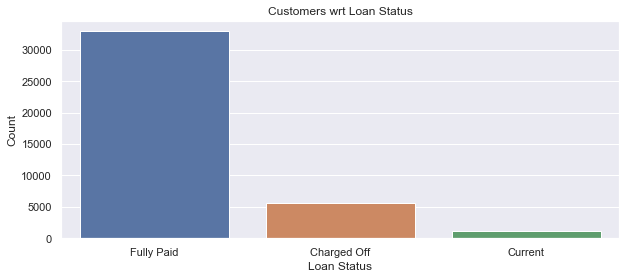

In [22]:
# Analysing loan status

# Defaulters with respect to their state of residence
plt.figure(figsize=(10, 4))
plt.title('Customers wrt Loan Status')
ax = sns.countplot(x = "loan_status", data = master);
ax.set(xlabel='Loan Status', ylabel='Count')

In [23]:
# Creating backup of master df into loan df
loan = pd.DataFrame(master)

# Henceforth, loan df will include all loan_statuses, master df will include only Charged Off loan status

# We are interested analysing only the loan defaulters, so we can filter the loan_status with Charged Off
master = master[master['loan_status'] == 'Charged Off']
master.shape

(5627, 22)

In [24]:
#taking Defaulters in to considerations.
#data[data['loan_status'] == 'Charged Off'].value_counts().index.tolist()
defaulters=master[master['loan_status'] == 'Charged Off']
fullypaid=master[master['loan_status'] == 'Fully Paid']
current=master[master['loan_status'] == 'Current']

## Analysis of Loan defaulters

In [25]:
# Loan defaulters by year 2011 tops
round(100*defaulters.groupby('issue_yr').size()/len(defaulters),2).reset_index(name='percent').sort_values('percent',ascending=False)

,issue_yr,percent
4,2011,57.86
3,2010,26.39
2,2009,10.56
1,2008,4.39
0,2007,0.80


In [26]:
# Loan defaulters by quarter, 4th quarter tops
round(100*defaulters.groupby(['Quarter']).size()/len(defaulters),2).reset_index(name='percent').sort_values('percent',ascending=False)

,Quarter,percent
3,4,32.98
2,3,26.55
1,2,23.44
0,1,17.03


In [27]:
# Loan defaulters by year and quarter, all year
round(100*defaulters.groupby(['issue_yr','Quarter']).size()/len(defaulters),2).reset_index(name='percent').sort_values(['percent','Quarter'],ascending=False)

,issue_yr,Quarter,percent
17,2011,4,18.94
16,2011,3,15.14
15,2011,2,13.81
14,2011,1,9.97
12,2010,3,8.17
13,2010,4,7.89
11,2010,2,6.63
9,2009,4,4.12
10,2010,1,3.70
8,2009,3,2.56


In [28]:
master.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,pub_rec,emp_title,verification_status,home_ownership,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,issue_d,issue_yr,issue_month,Quarter
1,2500,2500,60 months,15.27,C,0.0,0,Ryder,Source Verified,RENT,...,car,309xx,GA,1.00,1687,9.4,2011-12-01,2011,12,4
8,5600,5600,60 months,21.28,F,4.0,0,NaN,Source Verified,OWN,...,small_business,958xx,CA,5.55,5210,32.6,2011-12-01,2011,12,4
9,5375,5375,60 months,12.69,B,0.0,0,Starbucks,Verified,RENT,...,other,774xx,TX,18.08,9279,36.5,2011-12-01,2011,12,4
12,9000,9000,36 months,13.49,C,0.0,0,Va. Dept of Conservation/Recreation,Source Verified,RENT,...,debt_consolidation,245xx,VA,10.08,10452,91.7,2011-12-01,2011,12,4
14,10000,10000,36 months,10.65,B,3.0,0,SFMTA,Source Verified,RENT,...,other,951xx,CA,7.06,11997,55.5,2011-12-01,2011,12,4


### Univariate analysis of Term

In [29]:
# converting term to type 'category'
master['term'] = master['term'].astype('category')

# displaying frequencies of each category under term
master['term'].value_counts()

 36 months    3227
 60 months    2400
Name: term, dtype: int64

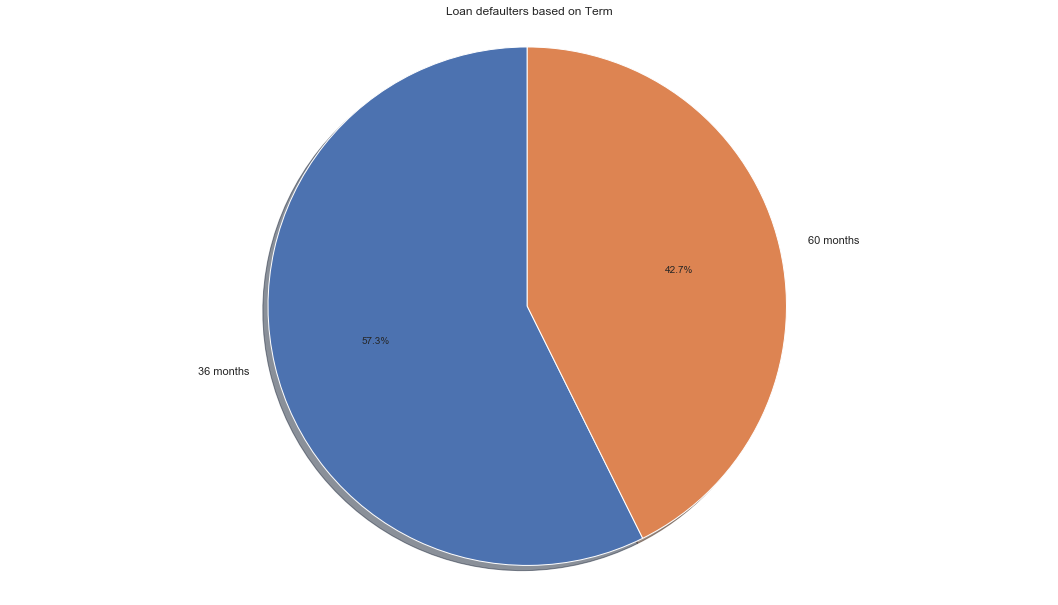

In [30]:
# Creating a pie-chart categorising wrt 'term'
df_loan_term = pd.DataFrame(master.term.value_counts())
pie_chart(df_loan_term,'term','Loan defaulters based on Term')

### Univariate analysis of Grade

In [31]:
# converting grade to type 'category'
master['grade'] = master['grade'].astype('category')

# displaying frequencies of each category
master['grade'].value_counts()

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

In [32]:
# Defaulters percentage by Grade
round(100*defaulters.groupby('grade').size()/len(defaulters),2).map(str) + "%"

grade
A     10.7%
B    25.32%
C    23.94%
D    19.87%
E    12.71%
F     5.67%
G     1.79%
dtype: object

[Text(0,0.5,'Count'), Text(0.5,0,'Loan Grade')]

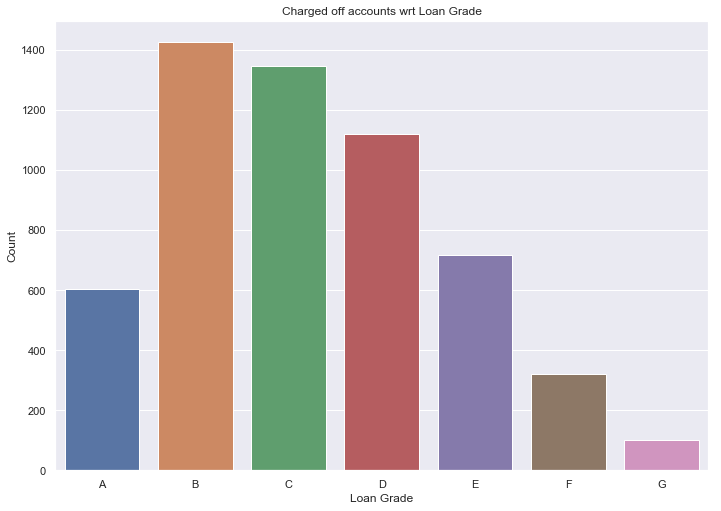

In [33]:
# Charged Off accounts with respect to loan grade
plt.figure(figsize=(11.7, 8.27))
plt.title('Charged off accounts wrt Loan Grade')
ax = sns.countplot(x = "grade", data = master);
ax.set(xlabel='Loan Grade', ylabel='Count')

### Univariate analysis of defaulters by work experience

In [34]:
# converting grade to type 'category'
master['emp_length'] = master['emp_length'].astype('category')

# displaying frequencies of each category
master['emp_length'].value_counts()

10.0    1559
0.0      639
2.0      567
3.0      555
4.0      462
5.0      458
1.0      456
6.0      307
7.0      263
8.0      203
9.0      158
Name: emp_length, dtype: int64

[Text(0.5,0,'Employment Length')]

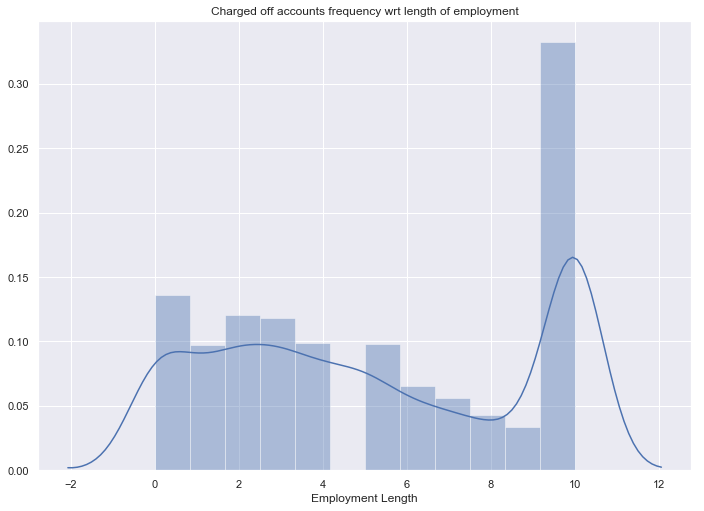

In [35]:
# Creating a histogram wrt 'emp_length'
df_emp_length = pd.DataFrame(master.emp_length)
fig, ax = plt.subplots(figsize=(11.7, 8.27))

plt.title('Charged off accounts frequency wrt length of employment')
ax = sns.distplot(df_emp_length);
ax.set(xlabel='Employment Length')

### Univariate analysis of home_ownership

In [36]:
# converting grade to type 'category'
master['home_ownership'] = master['home_ownership'].astype('category')

# displaying frequencies of each category
master['home_ownership'].value_counts()

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

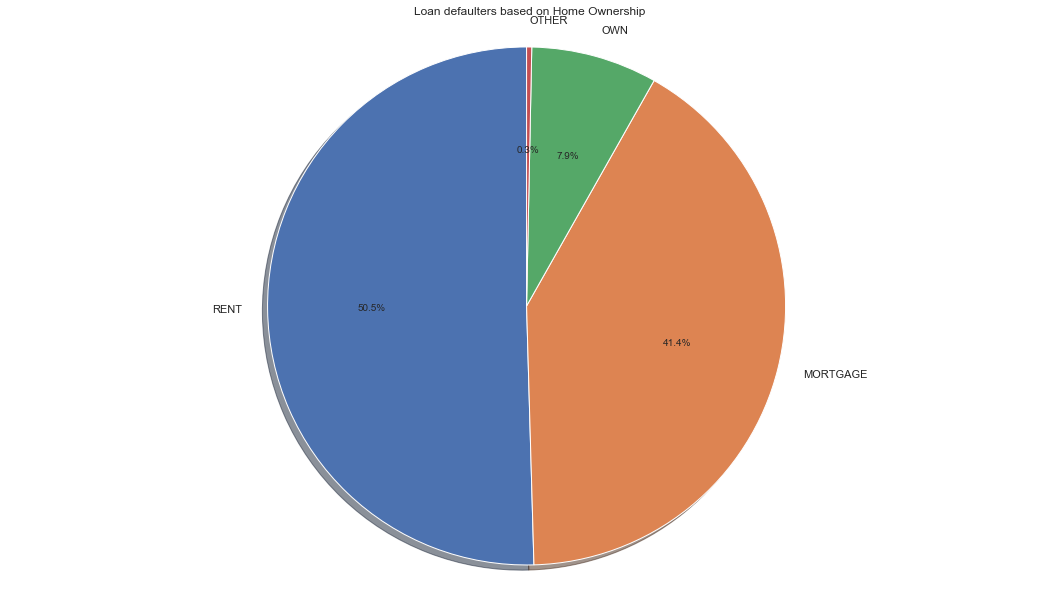

In [37]:
# Creating a pie-chart categorising wrt 'home_ownership'
df_home_ownership = pd.DataFrame(master.home_ownership.value_counts())
pie_chart(df_home_ownership,'home_ownership','Loan defaulters based on Home Ownership')

### Univariate analysis of purpose

In [38]:
# converting grade to type 'category'
master['purpose'] = master['purpose'].astype('category')

# displaying frequencies of each category
master['purpose'].value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

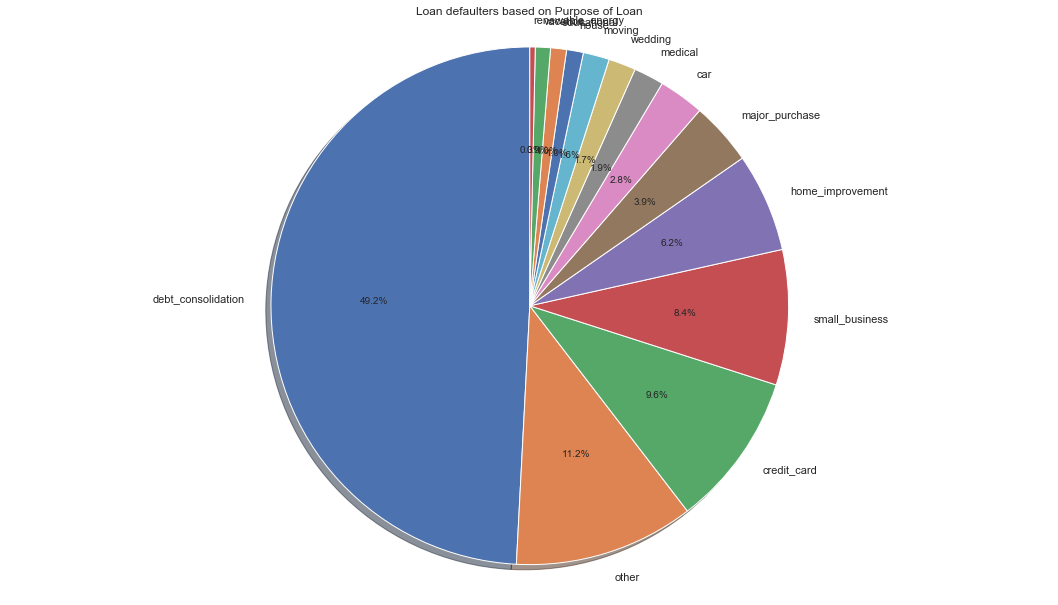

In [39]:
# Creating a pie-chart categorising wrt 'purpose'
df_purpose = pd.DataFrame(master.purpose.value_counts())
pie_chart(df_purpose,'purpose','Loan defaulters based on Purpose of Loan')

### Univariate analysis of verification_status

In [40]:
# converting verification_status to type 'category'
master['verification_status'] = master['verification_status'].astype('category')

# displaying frequencies of each category
master['verification_status'].value_counts()

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64

[Text(0,0.5,'Count'), Text(0.5,0,'Verification Status')]

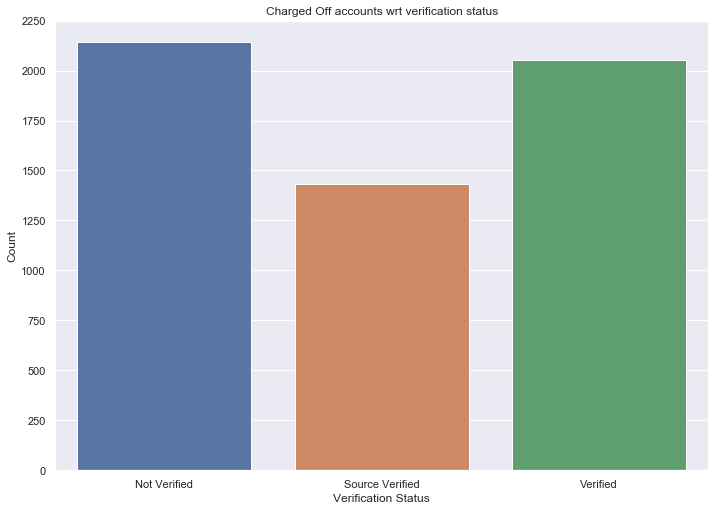

In [41]:
plt.figure(figsize=(11.7, 8.27))
plt.title('Charged Off accounts wrt verification status')
ax = sns.countplot(x = "verification_status", data = master);
ax.set(xlabel='Verification Status', ylabel='Count')

### Univariate analysis of addr_state

In [42]:
# converting grade to type 'category'
master['addr_state'] = master['addr_state'].astype('category')

# displaying frequencies of each category
master['addr_state'].value_counts().head()

CA    1125
FL     504
NY     495
TX     316
NJ     278
Name: addr_state, dtype: int64

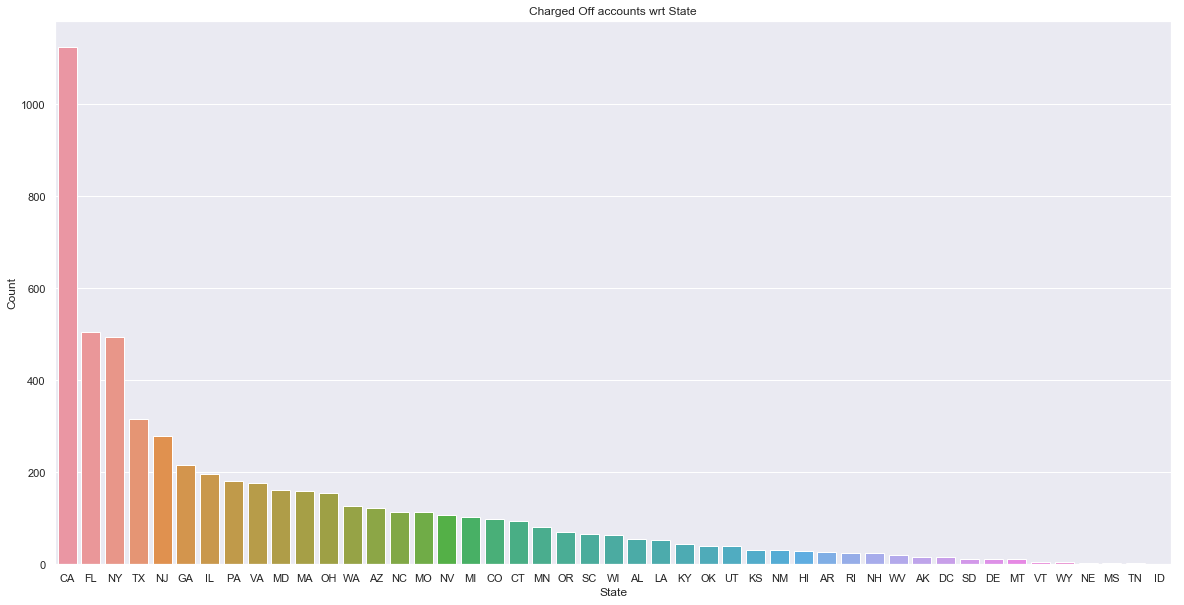

In [43]:
# Charged Off accounts wrt State
plt.figure(figsize=(20,10))
plt.title('Charged Off accounts wrt State')
ax = sns.countplot(x = "addr_state", data = master, order = master['addr_state'].value_counts().index);
ax.set(xlabel='State', ylabel='Count')
plt.show()

## Some insights on Employee Experience (>10) and Purpose

In [44]:
# Taking defaulters with emp_exp > 10 in top states
defaulters_exp_10=defaulters[defaulters['emp_length'] == 10]

In [45]:
# Loan defaulters who have derogatory public records
states=['CA','NY','FL','TX','NJ']
defaulters_exp_10[defaulters_exp_10['addr_state'].isin(states)].groupby(['pub_rec']).size().reset_index(name='count').sort_values('count',ascending=False)

,pub_rec,count
0,0,660
1,1,65
2,2,1


In [46]:
# Creating df defaulters_exp_10_state defaulters with exp > 10 in top 5 states
states=['CA','NY','FL','TX','NJ']
defaulters_exp_10_state=defaulters_exp_10[defaulters_exp_10['addr_state'].isin(states)].groupby(['issue_yr','addr_state']).size().reset_index(name='count').sort_values('count',ascending=False)#.unstack().plot(kind="bar",stacked=True,figsize=(6, 12),table=True,title="Defaulters with exp > 10 & TOP 5 states")

In [47]:
# State wise defaulters by year 2011
yr=[2011,2010,2009]
print(defaulters_exp_10_state[defaulters_exp_10_state['issue_yr'] == 2011 ])
print(defaulters_exp_10_state[defaulters_exp_10_state['issue_yr'] == 2010 ])
print(defaulters_exp_10_state[defaulters_exp_10_state['issue_yr'] == 2009 ])

    issue_yr addr_state  count
18      2011         CA    190
21      2011         NY     88
19      2011         FL     82
22      2011         TX     52
20      2011         NJ     43
    issue_yr addr_state  count
13      2010         CA     78
16      2010         NY     40
14      2010         FL     37
17      2010         TX     19
15      2010         NJ     15
    issue_yr addr_state  count
8       2009         CA     20
11      2009         NY      6
12      2009         TX      6
9       2009         FL      6
10      2009         NJ      5


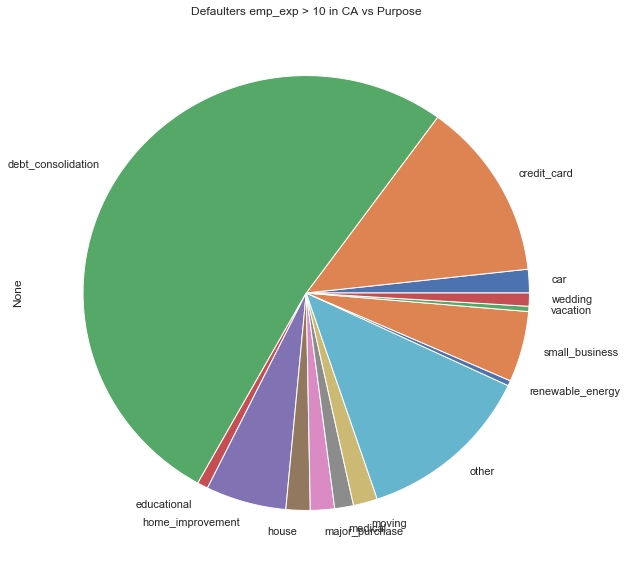

In [48]:
yr=[2011,2010,2009]
CA_state=['CA']
round(100*defaulters.loc[(defaulters['emp_length'] == 10) & (defaulters['issue_yr'].isin(yr)) & (defaulters['addr_state'].isin(CA_state))].groupby('purpose').size()/len(defaulters),2).plot(kind="pie",figsize=(10, 10),title="Defaulters emp_exp > 10 in CA vs Purpose")

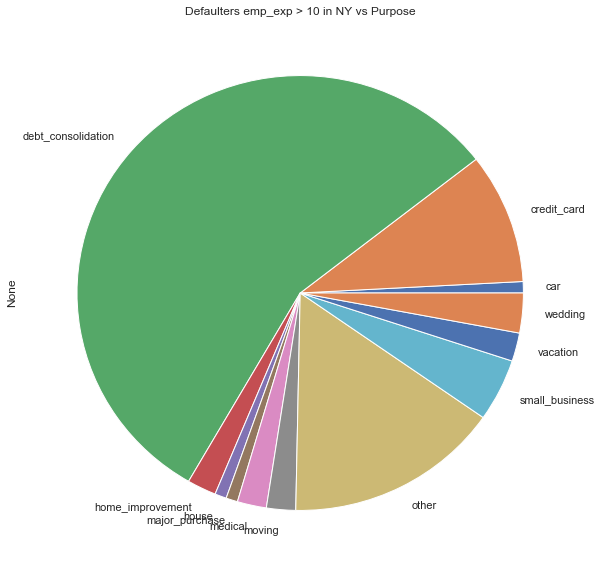

In [49]:
NY_state=['NY']
round(100*defaulters.loc[(defaulters['emp_length'] == 10) & (defaulters['issue_yr'].isin(yr)) & (defaulters['addr_state'].isin(NY_state))].groupby('purpose').size()/len(defaulters),2).plot(kind="pie",figsize=(10, 10),title="Defaulters emp_exp > 10 in NY vs Purpose")

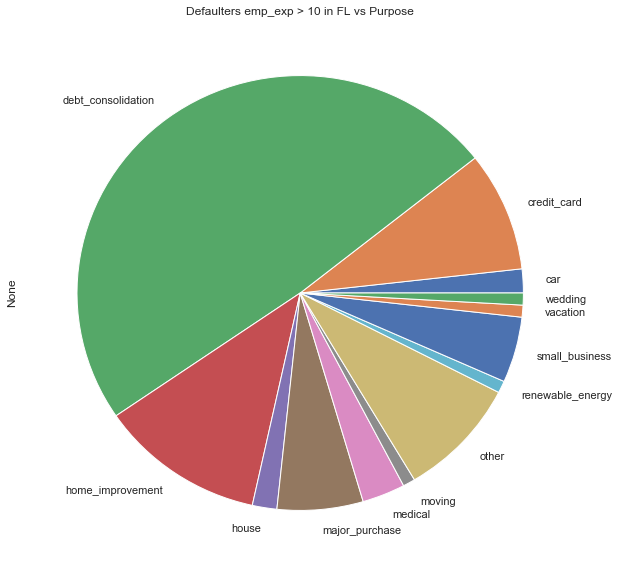

In [50]:
FL_state=['FL']
round(100*defaulters.loc[(defaulters['emp_length'] == 10) & (defaulters['issue_yr'].isin(yr)) & (defaulters['addr_state'].isin(FL_state))].groupby('purpose').size()/len(defaulters),2).plot(kind="pie",figsize=(10, 10),title="Defaulters emp_exp > 10 in FL vs Purpose")

### Univariate analysis of emp_title

In [51]:
# Correcting duplicate emp_title such as WALMART, walmart, wal-mart
master['emp_title'] = master['emp_title'].str.upper().str.replace('[^A-Za-z\s]+', '')

master.loc[(master['emp_title']=='USPS') | (master['emp_title']=='UNITED STATES POSTAL SERVICE'), 'emp_title'] = 'US POSTAL SERVICE'
master.loc[(master['emp_title']=='SELFEMPLOYED') | (master['emp_title']=='SELF'), 'emp_title'] = 'SELF EMPLOYED'
master.loc[master['emp_title']=='ARMY', 'emp_title'] = 'US ARMY'

In [52]:
# converting grade to type 'category'
master['emp_title'] = master['emp_title'].astype('category')

# displaying frequencies of each category
df_emp_title = master[master['emp_title'].isin(master['emp_title'].value_counts().head(5).index)]
df_emp_title = master.emp_title.value_counts().head(20)
df_emp_title

US ARMY                  39
US POSTAL SERVICE        33
WALMART                  26
SELF EMPLOYED            26
BANK OF AMERICA          24
UPS                      17
ATT                      17
VERIZON WIRELESS         13
MACYS                     9
IBM                       9
WELLS FARGO               8
HOME DEPOT                8
KAISER PERMANENTE         8
RETIRED                   8
WALGREENS                 8
US AIR FORCE              8
JP MORGAN CHASE           7
DEPARTMENT OF DEFENSE     7
TARGET                    7
LOWES                     7
Name: emp_title, dtype: int64

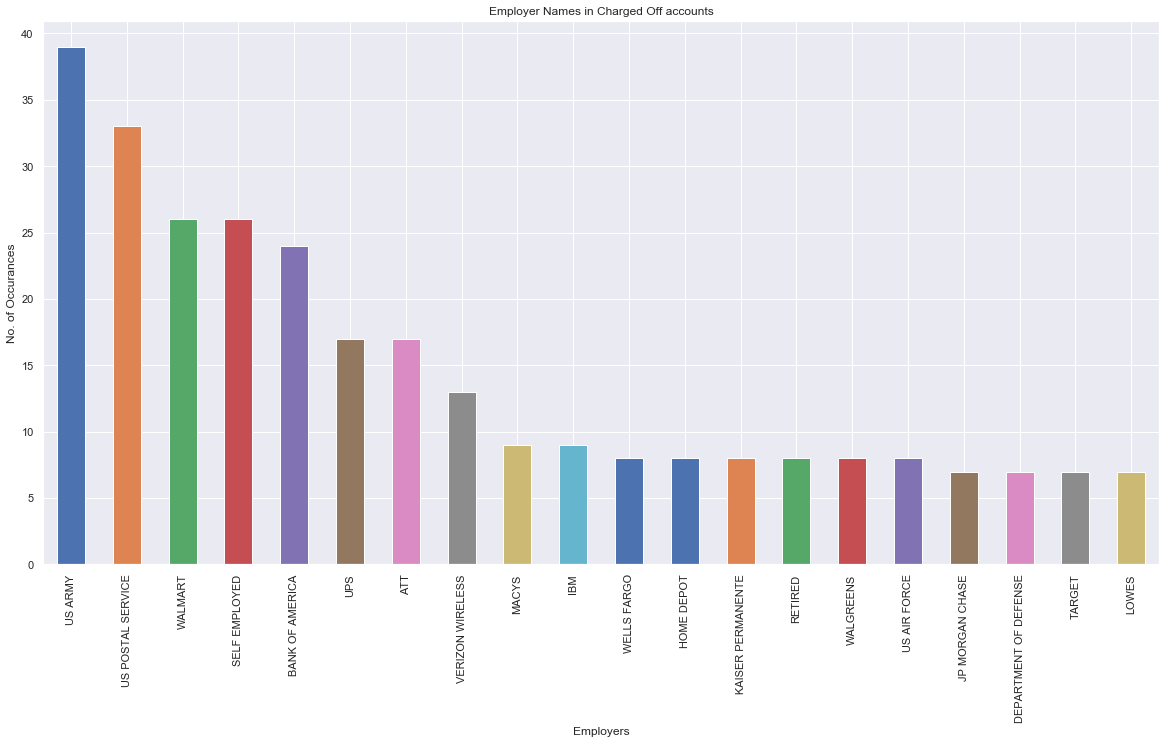

In [53]:
plt.figure(figsize=(20,10))
plt.title('Employer Names in Charged Off accounts')
plt.ylabel('No. of Occurances', fontsize=12)
plt.xlabel('Employers', fontsize=12)

df_emp_title.plot(kind="bar")
plt.show()

In [54]:
# Creating a barchart wrt 'emp_title'

# sns.barplot(x="day", y="total_bill", data=tips)
# sns.barplot(df_emp_title.index, df_emp_title.emp_title, alpha=0.8)

# plt.figure(figsize=(20,10))
# sns.countplot(x = "emp_title", data = df_emp_title)

In [55]:
master.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,pub_rec,emp_title,verification_status,home_ownership,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,issue_d,issue_yr,issue_month,Quarter
1,2500,2500,60 months,15.27,C,0.0,0,RYDER,Source Verified,RENT,...,car,309xx,GA,1.00,1687,9.4,2011-12-01,2011,12,4
8,5600,5600,60 months,21.28,F,4.0,0,NaN,Source Verified,OWN,...,small_business,958xx,CA,5.55,5210,32.6,2011-12-01,2011,12,4
9,5375,5375,60 months,12.69,B,0.0,0,STARBUCKS,Verified,RENT,...,other,774xx,TX,18.08,9279,36.5,2011-12-01,2011,12,4
12,9000,9000,36 months,13.49,C,0.0,0,VA DEPT OF CONSERVATIONRECREATION,Source Verified,RENT,...,debt_consolidation,245xx,VA,10.08,10452,91.7,2011-12-01,2011,12,4
14,10000,10000,36 months,10.65,B,3.0,0,SFMTA,Source Verified,RENT,...,other,951xx,CA,7.06,11997,55.5,2011-12-01,2011,12,4


In [56]:
master.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,pub_rec,emp_title,verification_status,home_ownership,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,issue_d,issue_yr,issue_month,Quarter
1,2500,2500,60 months,15.27,C,0.0,0,RYDER,Source Verified,RENT,...,car,309xx,GA,1.00,1687,9.4,2011-12-01,2011,12,4
8,5600,5600,60 months,21.28,F,4.0,0,NaN,Source Verified,OWN,...,small_business,958xx,CA,5.55,5210,32.6,2011-12-01,2011,12,4
9,5375,5375,60 months,12.69,B,0.0,0,STARBUCKS,Verified,RENT,...,other,774xx,TX,18.08,9279,36.5,2011-12-01,2011,12,4
12,9000,9000,36 months,13.49,C,0.0,0,VA DEPT OF CONSERVATIONRECREATION,Source Verified,RENT,...,debt_consolidation,245xx,VA,10.08,10452,91.7,2011-12-01,2011,12,4
14,10000,10000,36 months,10.65,B,3.0,0,SFMTA,Source Verified,RENT,...,other,951xx,CA,7.06,11997,55.5,2011-12-01,2011,12,4


### Univariate analysis of Annual Income

In [57]:
master[['annual_inc']].describe()

,annual_inc
count,5.627000e+03
mean,6.242730e+04
std,4.777601e+04
min,4.080000e+03
25%,3.700000e+04
50%,5.300000e+04
75%,7.500000e+04
max,1.250000e+06


[None]

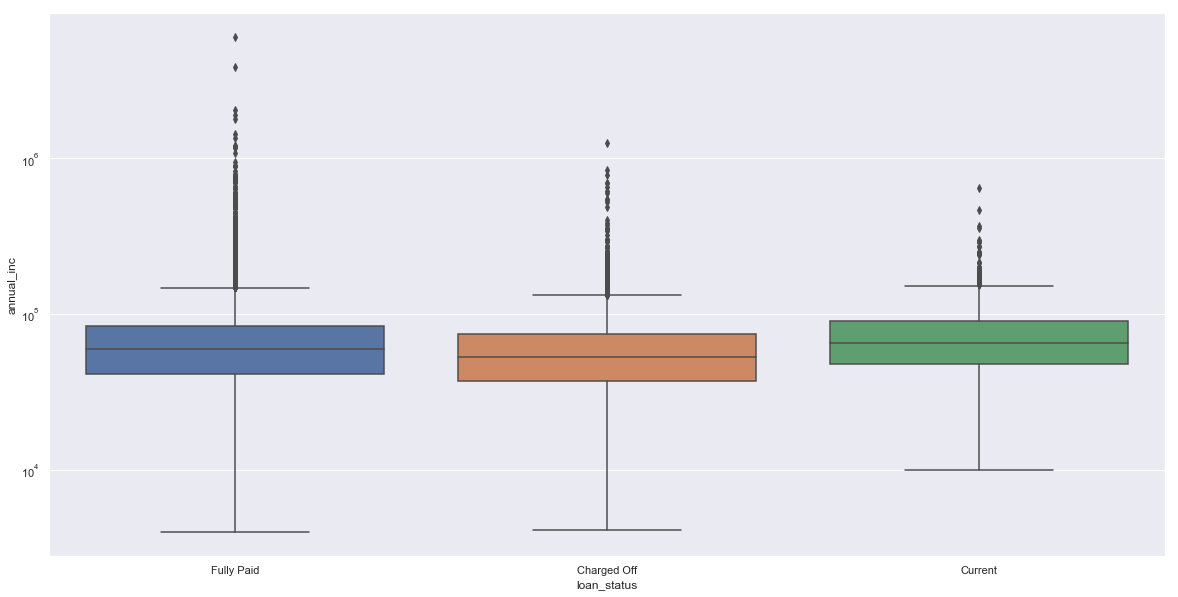

In [58]:
# Univariate analysis of Annual Income wrt Charged Off accounts
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="loan_status", y="annual_inc", data=loan);
ax.set(yscale="log")

### Bivariate analysis of verification_status Vs loan_status

[None]

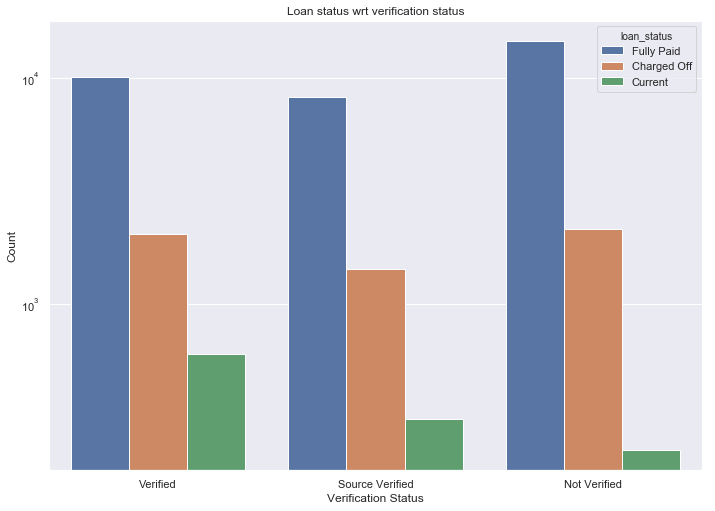

In [59]:
plt.figure(figsize=(11.7, 8.27))
plt.title('Loan status wrt verification status')
ax = sns.countplot(x = "verification_status", hue="loan_status", data = loan);
ax.set(xlabel='Verification Status', ylabel='Count')
ax.set(yscale="log")

### Bivariate analysis of emp_length Vs loan_status

[None]

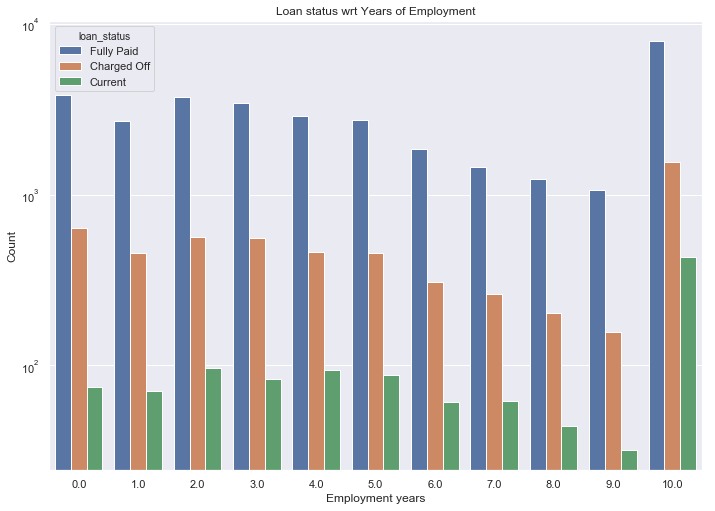

In [60]:
plt.figure(figsize=(11.7, 8.27))
plt.title('Loan status wrt Years of Employment')
ax = sns.countplot(x = "emp_length", hue="loan_status", data = loan);
ax.set(xlabel='Employment years', ylabel='Count')
ax.set(yscale="log")

### Bivariate analysis of grade Vs loan_status

[None]

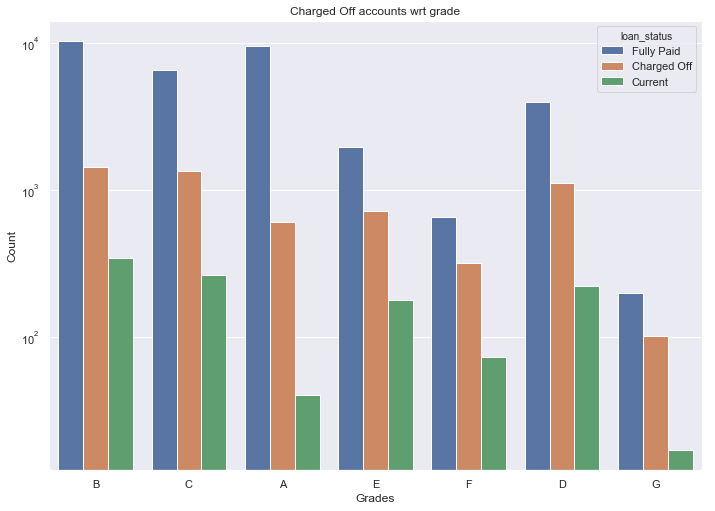

In [61]:
plt.figure(figsize=(11.7, 8.27))
plt.title('Charged Off accounts wrt grade')
ax = sns.countplot(x = "grade", hue="loan_status", data = loan);
ax.set(xlabel='Grades', ylabel='Count')
ax.set(yscale="log")

In [62]:
loan.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,pub_rec,emp_title,verification_status,home_ownership,...,purpose,zip_code,addr_state,dti,revol_bal,revol_util,issue_d,issue_yr,issue_month,Quarter
0,5000,5000,36 months,10.65,B,10.0,0,NaN,Verified,RENT,...,credit_card,860xx,AZ,27.65,13648,83.7,2011-12-01,2011,12,4
1,2500,2500,60 months,15.27,C,0.0,0,Ryder,Source Verified,RENT,...,car,309xx,GA,1.00,1687,9.4,2011-12-01,2011,12,4
2,2400,2400,36 months,15.96,C,10.0,0,NaN,Not Verified,RENT,...,small_business,606xx,IL,8.72,2956,98.5,2011-12-01,2011,12,4
3,10000,10000,36 months,13.49,C,10.0,0,AIR RESOURCES BOARD,Source Verified,RENT,...,other,917xx,CA,20.00,5598,21.0,2011-12-01,2011,12,4
4,3000,3000,60 months,12.69,B,1.0,0,University Medical Group,Source Verified,RENT,...,other,972xx,OR,17.94,27783,53.9,2011-12-01,2011,12,4


### Bivariate analysis of purpose Vs loan_status

[Text(0,0.5,'Count'), Text(0.5,0,'Purpose')]

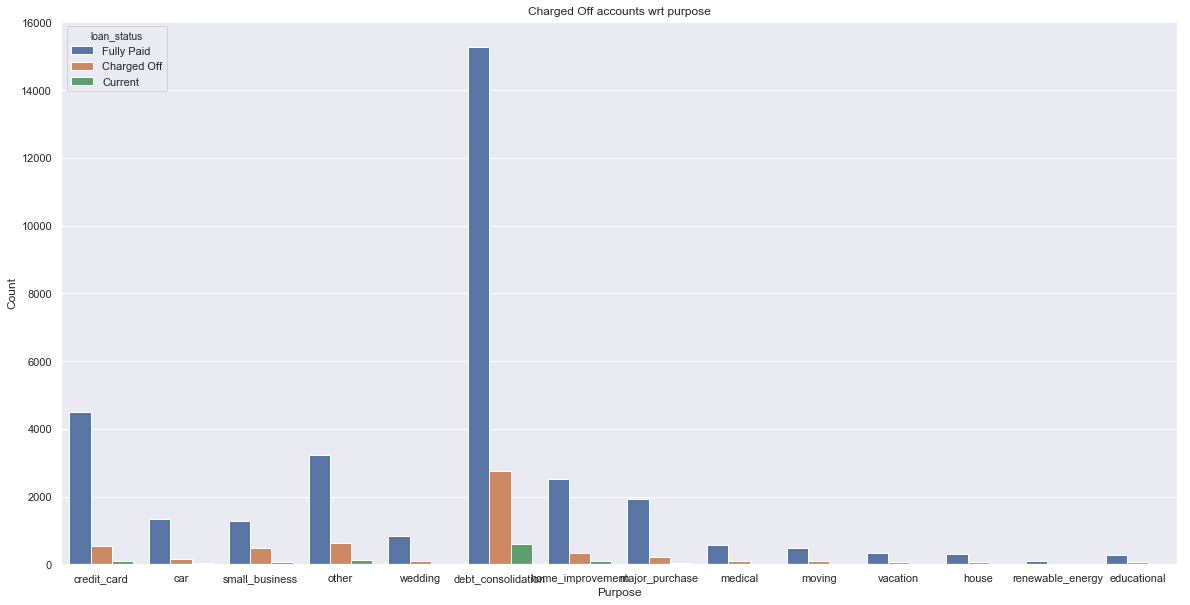

In [63]:
plt.figure(figsize=(20, 10))
plt.title('Charged Off accounts wrt purpose')
ax = sns.countplot(x = "purpose", hue="loan_status", data = loan);
ax.set(xlabel='Purpose', ylabel='Count')

### Bivariate analysis of annual_inc Vs funded_amnt

[None]

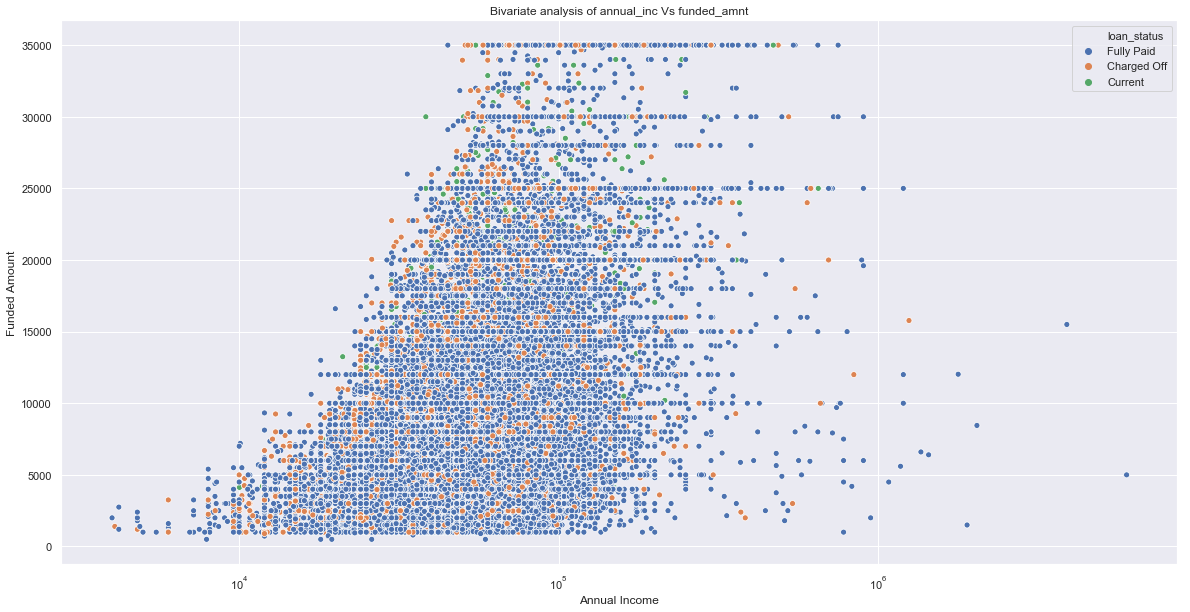

In [64]:
plt.figure(figsize=(20, 10))
plt.title('Bivariate analysis of annual_inc Vs funded_amnt')
ax = sns.scatterplot(x = "annual_inc", y="funded_amnt", hue="loan_status", data = loan);
ax.set(xlabel='Annual Income', ylabel='Funded Amount')
ax.set(xscale="log")

### Correlation analysis between DTI, Revolving line utilization rate and Fund amount

In [65]:
df_corr = pd.DataFrame(loan)
df_corr = df_corr[~np.isnan(df_corr['revol_util'])]

<Figure size 1440x720 with 0 Axes>

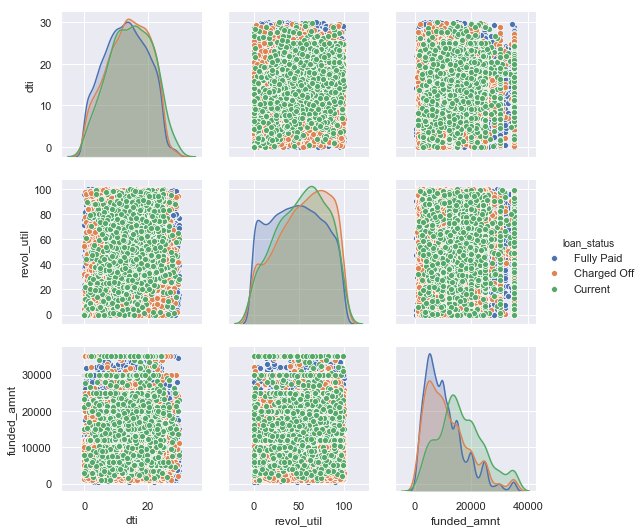

In [66]:
plt.figure(figsize=(20, 10))
sns.pairplot(df_corr, vars=['dti', 'revol_util', 'funded_amnt'],hue="loan_status")

### Treand of Debt to Income Ratio over the years (2007 - 2011)

[Text(0,0.5,'Debt to Income Ratio (DTI)'), Text(0.5,0,'Loan Issue Date')]

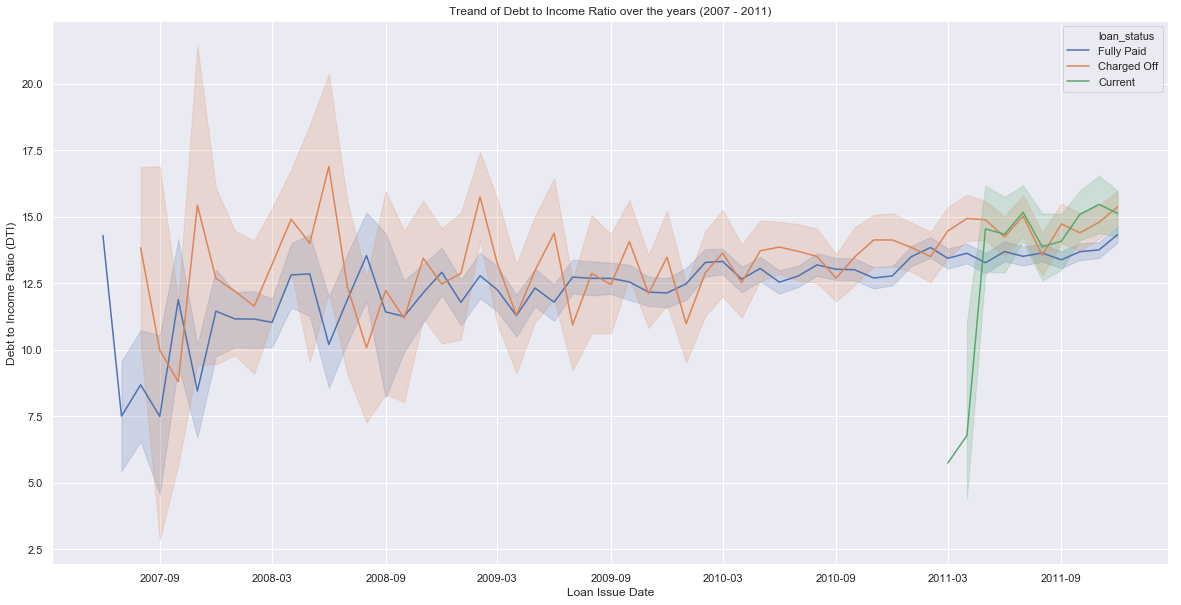

In [67]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="issue_d", y="dti", hue="loan_status",data=df_corr)
plt.title('Treand of Debt to Income Ratio over the years (2007 - 2011)')
ax.set(xlabel='Loan Issue Date',ylabel='Debt to Income Ratio (DTI)')

The plot above shows the treand of Debt to Income Ration (DTI) over several years. From this we can conclude that the DTI has been gradually increasing with time. This means that the people are more inclined to spend more. The orange curve shows that more and more loans are getting Charged off through the years, and so the banks have to adopt stringent policies over approving loans